In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler


from pylab import rcParams
rcParams['figure.figsize']=12,6
RANDOM_SEED =42
LABELS = ['Normal', 'Fraud']

In [ ]:
data = pd.read_csv("creditcard.csv")

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35742 entries, 0 to 35741
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    35742 non-null  int64  
 1   V1      35742 non-null  float64
 2   V2      35742 non-null  float64
 3   V3      35742 non-null  float64
 4   V4      35742 non-null  float64
 5   V5      35742 non-null  float64
 6   V6      35741 non-null  float64
 7   V7      35741 non-null  float64
 8   V8      35741 non-null  float64
 9   V9      35741 non-null  float64
 10  V10     35741 non-null  float64
 11  V11     35741 non-null  float64
 12  V12     35741 non-null  float64
 13  V13     35741 non-null  float64
 14  V14     35741 non-null  float64
 15  V15     35741 non-null  float64
 16  V16     35741 non-null  float64
 17  V17     35741 non-null  float64
 18  V18     35741 non-null  float64
 19  V19     35741 non-null  float64
 20  V20     35741 non-null  float64
 21  V21     35741 non-null  float64
 22

In [ ]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [ ]:
data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
35737,38240,1.232390,0.122010,0.157352,0.261906,0.158523,0.273022,-0.143169,0.138664,-0.146805,...,-0.233618,-0.677894,0.052511,-0.816369,0.221553,0.158446,-0.018118,-0.003168,1.79,0.0
35738,38240,1.114040,0.571203,0.427035,2.442135,-0.020967,-0.501774,0.320237,-0.082876,-1.182685,...,0.028826,-0.032705,-0.056634,0.535225,0.540930,-0.025773,-0.035775,0.011219,24.99,0.0
35739,38241,1.057020,0.007895,0.239256,1.236048,0.032239,0.350868,0.023279,0.137328,0.037981,...,-0.043316,-0.022866,-0.155991,-0.283221,0.662538,-0.314989,0.027467,0.010613,53.96,0.0
35740,38241,-1.546226,0.693338,1.002815,-1.528992,0.294692,-0.464031,0.264880,0.307358,0.022915,...,-0.176713,-0.164637,0.197999,-0.463070,-0.118578,0.739989,0.043625,-0.140629,0.76,0.0
35741,38241,-0.231062,0.243033,1.071749,-0.324598,-0.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
data.isnull().any()

,0
Time,False
V1,False
V2,False
V3,False
V4,False
V5,False
V6,True
V7,True
V8,True
V9,True


Text(0, 0.5, 'Frequency')

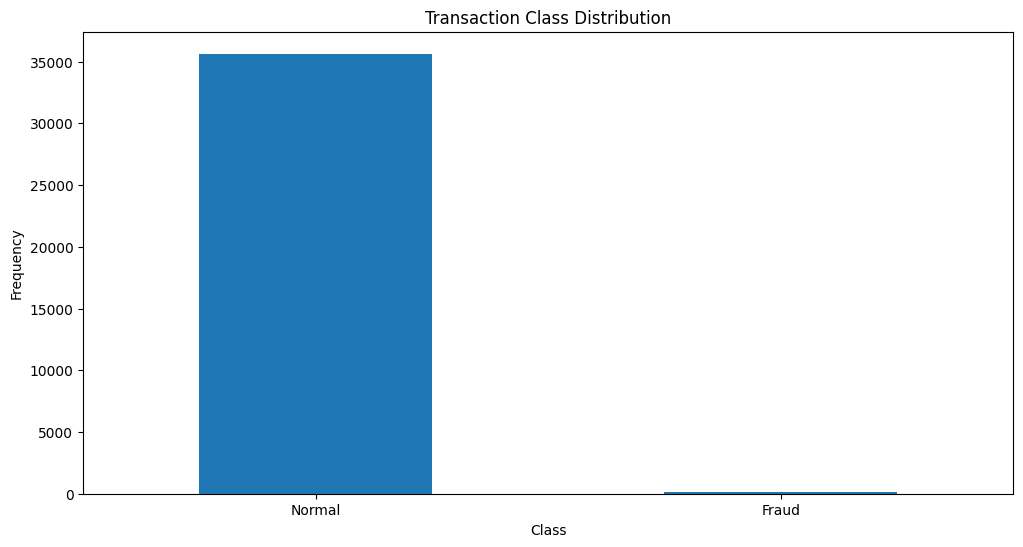

In [ ]:
count_classes = data['Class'].value_counts(sort=True)
count_classes.plot(kind = 'bar', rot=0)
plt.title("Transaction Class Distribution")
plt.xticks(range(2), LABELS)
plt.xlabel("Class")
plt.ylabel("Frequency")

In [ ]:
fraud = data.loc[data['Class'] ==1]
normal = data.loc[data['Class'] ==0]


In [ ]:
print(fraud.shape, normal.shape)

(103, 31) (35638, 31)


In [ ]:
fraud

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
541,406,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1.0
623,472,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1.0
4920,4462,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1.0
6108,6986,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1.0
6329,7519,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30442,35926,-3.896583,4.518355,-4.454027,5.547453,-4.121459,-1.163407,-6.805053,2.928356,-4.917130,...,1.691042,0.920021,-0.151104,0.011007,0.080303,0.412191,0.635789,0.501050,4.56,1.0
30473,35942,-4.194074,4.382897,-5.118363,4.455230,-4.812621,-1.224645,-7.281328,3.332250,-3.679659,...,1.550473,0.614573,0.028521,0.013704,-0.149512,-0.131687,0.473934,0.473757,14.46,1.0
30496,35953,-4.844372,5.649439,-6.730396,5.252842,-4.409566,-1.740767,-6.311699,3.449167,-5.416284,...,1.194888,-0.845753,0.190674,-0.216443,-0.325033,-0.270328,0.210214,0.391855,111.70,1.0
31002,36170,-5.685013,5.776516,-7.064977,5.902715,-4.715564,-1.755633,-6.958679,3.877795,-5.541529,...,1.128641,-0.962960,-0.110045,-0.177733,-0.089175,-0.049447,0.303445,0.219380,111.70,1.0


In [ ]:
fraud.count()

,0
Time,103
V1,103
V2,103
V3,103
V4,103
V5,103
V6,103
V7,103
V8,103
V9,103


In [ ]:
fraud.sum()

,0
Time,2.111324e+06
V1,-7.995556e+02
V2,6.013807e+02
V3,-1.128594e+03
V4,6.088901e+02
V5,-5.617412e+02
V6,-2.375268e+02
V7,-7.975393e+02
V8,3.983958e+02
V9,-3.050654e+02


In [ ]:
len(fraud)

103

In [ ]:
len(normal)

35638

In [ ]:
normal.Amount.describe()

,Amount
count,35638.000000
mean,84.185241
std,227.223359
min,0.000000
25%,7.000000
50%,22.000000
75%,76.000000
max,7879.420000


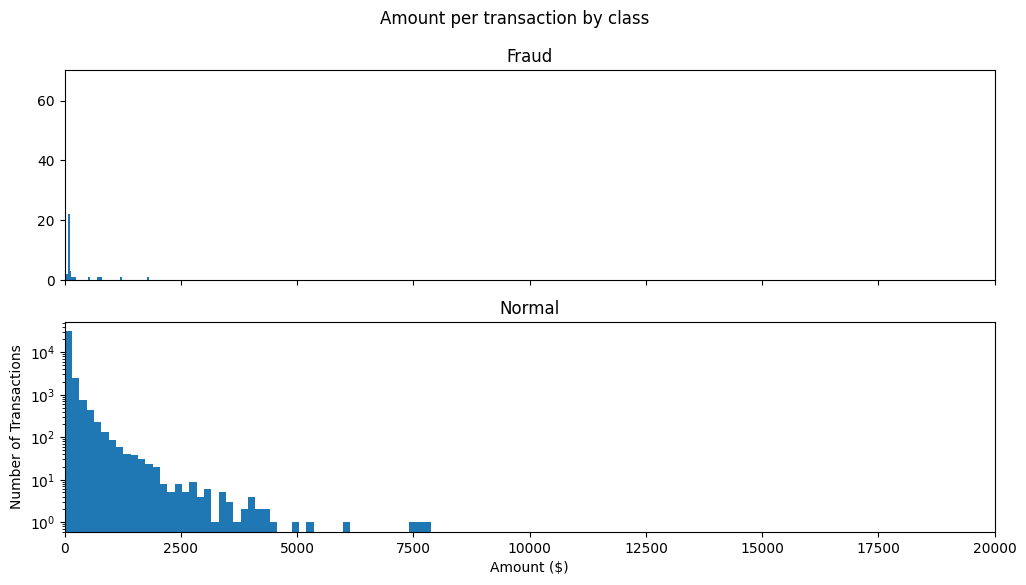

In [ ]:
f, (ax1, ax2) = plt.subplots(2,1, sharex=True)
f.suptitle("Amount per transaction by class")
ax1.hist(fraud.Amount, bins=50)
ax1.set_title('Fraud')
ax2.hist(normal.Amount , bins=50)
ax2.set_title('Normal')
plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.xlim(0,20000)
plt.yscale('log')
plt.show()

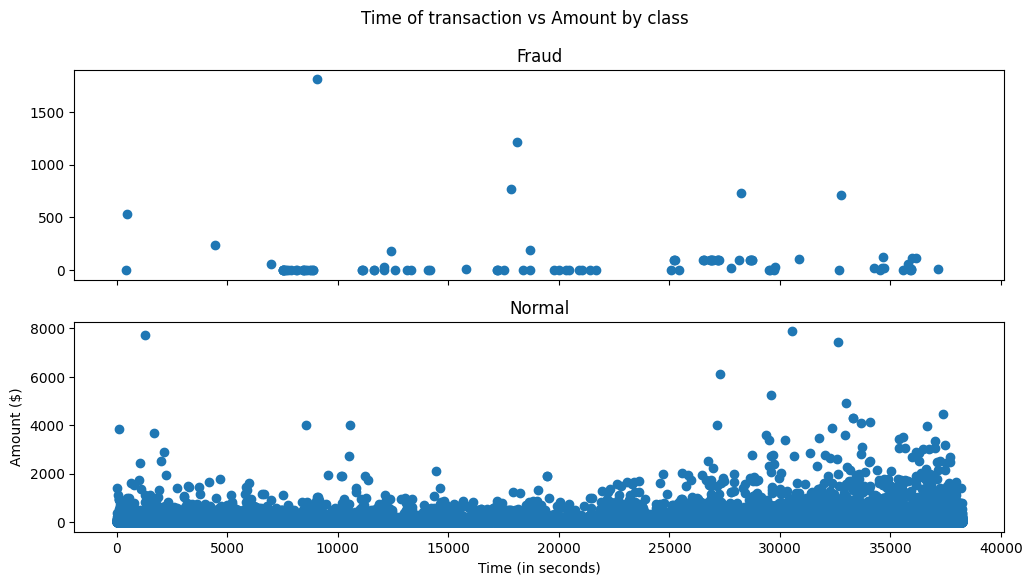

In [ ]:
f, (ax1, ax2) = plt.subplots(2,1, sharex=True)
f.suptitle("Time of transaction vs Amount by class")
ax1.scatter(fraud.Time, fraud.Amount)
ax1.set_title('Fraud')
ax2.scatter(normal.Time , normal.Amount)
ax2.set_title('Normal')
plt.ylabel('Amount ($)')
plt.xlabel('Time (in seconds)')
plt.show()

<Axes: >

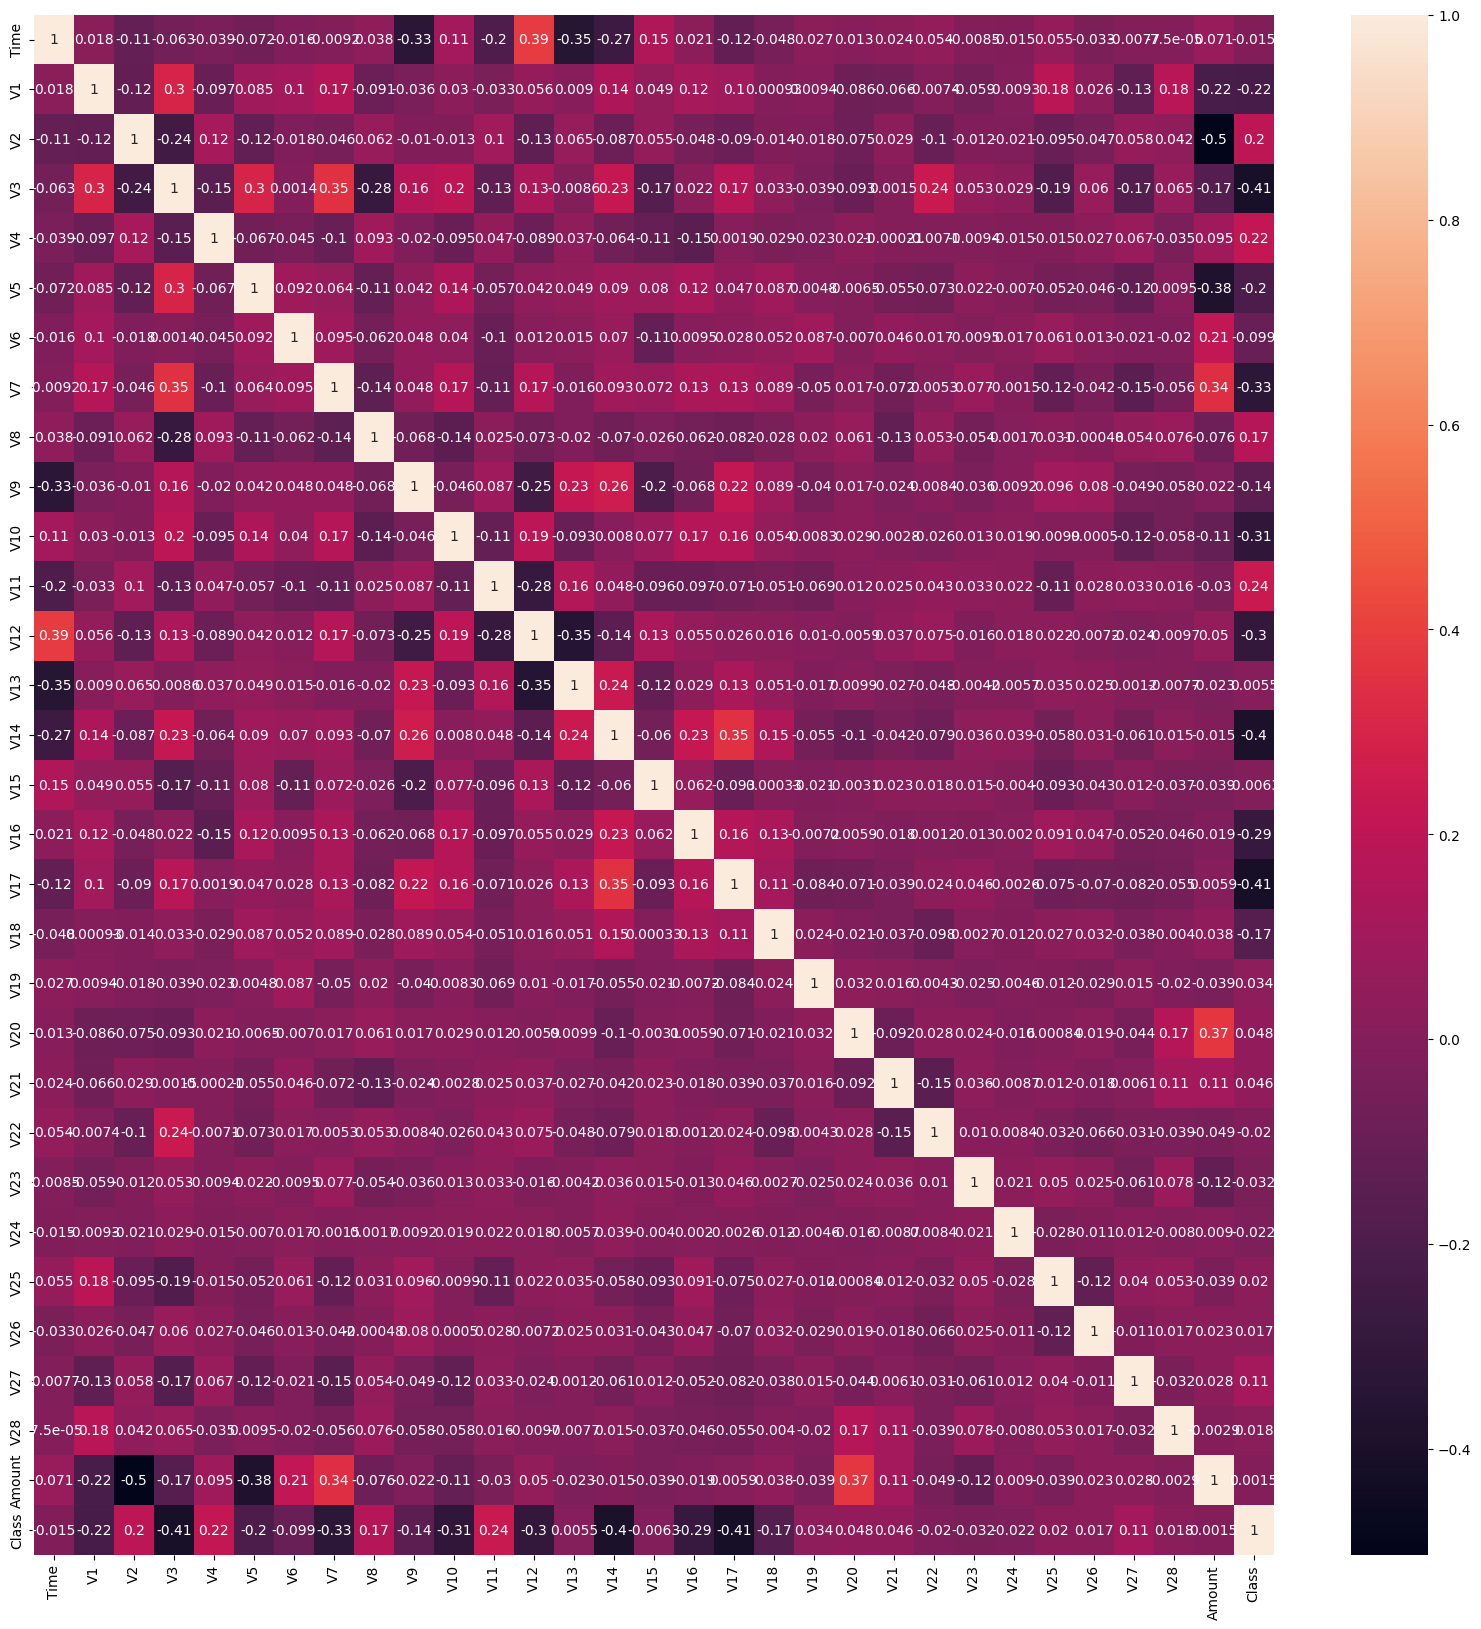

In [ ]:
import seaborn as sns
cormat = data.corr()
top_corr_features =cormat.index
plt.figure(figsize=(20,20))
sns.heatmap(data[top_corr_features].corr(), annot=True)


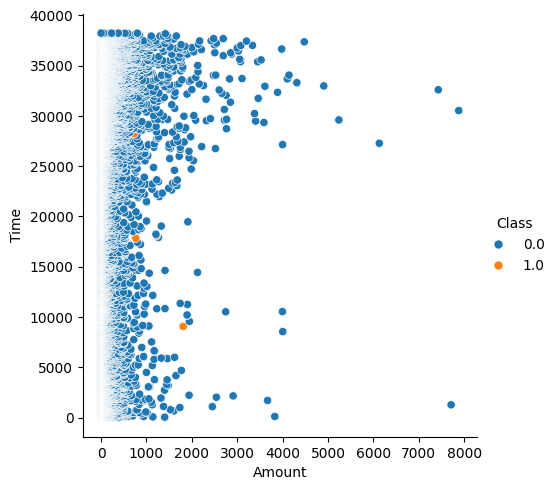

In [ ]:
sns.relplot(x="Amount", y="Time",hue="Class", data=data)

In [41]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
import joblib
import numpy as np

# Handle missing values by dropping rows with NaNs
data_cleaned = data.dropna()

# Feature selection
X = data_cleaned.drop(['Class'], axis=1)
y = data_cleaned['Class']

# Standardize features
scaler_dbscan = StandardScaler()
X_scaled = scaler_dbscan.fit_transform(X)

# DBSCAN model
dbscan = DBSCAN(eps=1.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_scaled)

# Assign predicted labels (-1 as anomaly/fraud, 1 as legit)
predicted = np.where(dbscan_labels == -1, 1, 0)

# Evaluation
print("DBSCAN Classification Report (Label -1 as Fraud):")
print(classification_report(y, predicted))

# Save model and scaler
joblib.dump(dbscan, "dbscan_model.pkl")
joblib.dump(scaler_dbscan, "scaler_dbscan.pkl")

DBSCAN Classification Report (Label -1 as Fraud):
              precision    recall  f1-score   support

         0.0       1.00      0.52      0.68     35638
         1.0       0.01      0.99      0.01       103

    accuracy                           0.52     35741
   macro avg       0.50      0.75      0.35     35741
weighted avg       1.00      0.52      0.68     35741



['scaler_dbscan.pkl']

In [42]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report

In [46]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Input

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=RANDOM_SEED, stratify=y)

# Build and train a simple deep learning model
model_dl = Sequential([
    Input(shape=(X_train.shape[1],)), # Use Input layer
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])

model_dl.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
model_dl.fit(X_train, y_train, epochs=10, batch_size=2048, validation_split=0.2)

Epoch 1/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.2712 - loss: 0.8362 - val_accuracy: 0.6496 - val_loss: 0.6356
Epoch 2/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7587 - loss: 0.5822 - val_accuracy: 0.9545 - val_loss: 0.4546
Epoch 3/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9732 - loss: 0.4202 - val_accuracy: 0.9958 - val_loss: 0.3299
Epoch 4/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9966 - loss: 0.3040 - val_accuracy: 0.9974 - val_loss: 0.2378
Epoch 5/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9976 - loss: 0.2186 - val_accuracy: 0.9974 - val_loss: 0.1702
Epoch 6/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9978 - loss: 0.1554 - val_accuracy: 0.9974 - val_loss: 0.1225
Epoch 7/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9974 - loss: 0.1141 - val_accuracy: 0.9974 - val_loss: 0.0896
Epoch 8/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9975 - loss: 0.0838 - val_accuracy: 0.9974 - val_loss

In [45]:
# Evaluate on test set
dl_preds = (model_dl.predict(X_test) > 0.5).astype("int32")
print("Deep Learning Model Evaluation:")
print(classification_report(y_test, dl_preds))

224/224 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Deep Learning Model Evaluation:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      7128
         1.0       0.43      0.29      0.34        21

    accuracy                           1.00      7149
   macro avg       0.71      0.64      0.67      7149
weighted avg       1.00      1.00      1.00      7149



In [47]:
from sklearn.preprocessing import StandardScaler
import joblib

# Assume X_train is defined
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Save model using newer Keras format
model_dl.save("fraud_dl_model.keras")

# Save the scaler
joblib.dump(scaler, "scaler.pkl")

['scaler.pkl']

To deploy this application, you would typically use a production web server like Gunicorn.
For example, you could run: gunicorn --bind 0.0.0.0:5000 app:app
Within Colab/Jupyter, running app.run() below will block the notebook.
You can test the routes by sending POST requests to /predict_dbscan or /predict_dl.


In [50]:
streamlit run app.py


SyntaxError: invalid syntax (ipython-input-50-507122745.py, line 1)